# Data Loading


In [88]:
import pandas as pd

# Load the training data
train = pd.read_csv('/content/Train.csv')

# Load the economic indicators data (assuming it's available locally)
df_econ = pd.read_csv('/content/economic_indicators.csv')

# Display the first few rows of the training data
display(train.head())

# Display information about the training data
train.info()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

# Data Cleaning

#

In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data (using the already loaded 'train' DataFrame)
df = train.copy()

# Convert dates and extract year for merging
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['Year'] = df['disbursement_date'].dt.year

# Handle duplicates and critical missing
df.drop_duplicates(inplace=True)
df.dropna(subset=['target'], inplace=True)  # Drop rows missing target

# Impute numerical columns (mean)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical columns (mode, excluding IDs)
cat_cols = df.select_dtypes(include=['object']).columns.drop(['ID'])
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Save or use cleaned data
# df.to_csv('cleaned_train.csv', index=False)

In [90]:
print(df.info())
print(df.describe())

# Identify categorical columns excluding 'ID'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print("\nCategorical columns (excluding ID):", categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           68654 non-null  object        
 1   customer_id                  68654 non-null  float64       
 2   country_id                   68654 non-null  object        
 3   tbl_loan_id                  68654 non-null  float64       
 4   lender_id                    68654 non-null  float64       
 5   loan_type                    68654 non-null  object        
 6   Total_Amount                 68654 non-null  float64       
 7   Total_Amount_to_Repay        68654 non-null  float64       
 8   disbursement_date            68654 non-null  datetime64[ns]
 9   due_date                     68654 non-null  datetime64[ns]
 10  duration                     68654 non-null  float64       
 11  New_versus_Repeat            68654 non-nu

**Explanation of Results**:
The output of `df.info()` provides a summary of the DataFrame, including the number of non-null entries in each column and their data types. `df.describe()` provides descriptive statistics for the numerical columns. These outputs help us understand the structure of the data, identify missing values (although cleaning steps aimed to address these), and get an overview of the distribution of numerical features. The identified categorical columns are listed for further exploration.

# Exploratory data analysis (eda)

In [92]:
for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(df[col].value_counts())


Value counts for column: country_id
country_id
Kenya    68654
Name: count, dtype: int64

Value counts for column: loan_type
loan_type
Type_1     61723
Type_7      2790
Type_5      1521
Type_4      1235
Type_10      466
Type_6       357
Type_9       205
Type_14       99
Type_2        74
Type_11       42
Type_18       30
Type_17       23
Type_12       21
Type_23       18
Type_20       13
Type_16       12
Type_13       10
Type_19        4
Type_15        4
Type_21        3
Type_24        3
Type_22        1
Name: count, dtype: int64

Value counts for column: New_versus_Repeat
New_versus_Repeat
Repeat Loan    68087
New Loan         567
Name: count, dtype: int64


**Explanation of Results**:
The value counts for categorical columns show the frequency of each unique value within those columns. This helps us understand the distribution of categories and identify potential class imbalances, which is particularly important for features like `country_id`, `loan_type`, and `New_versus_Repeat`.

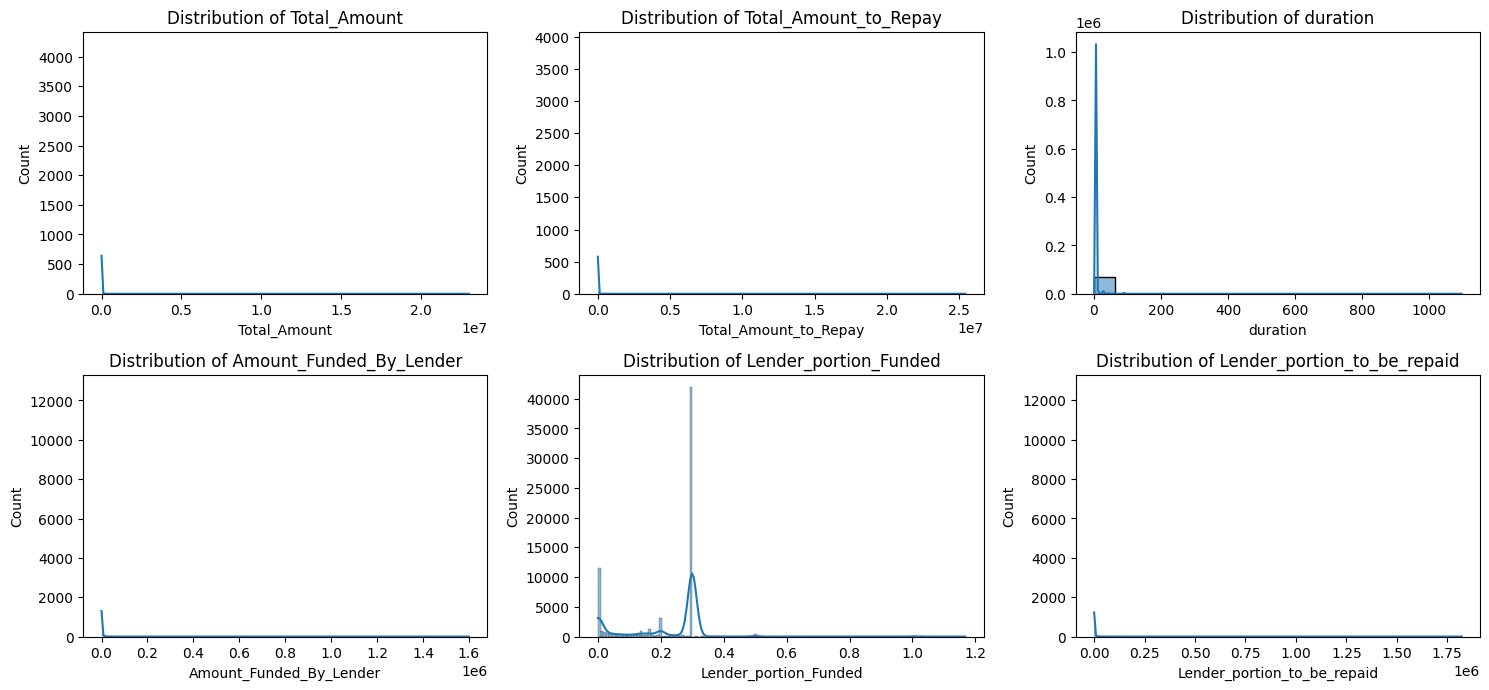

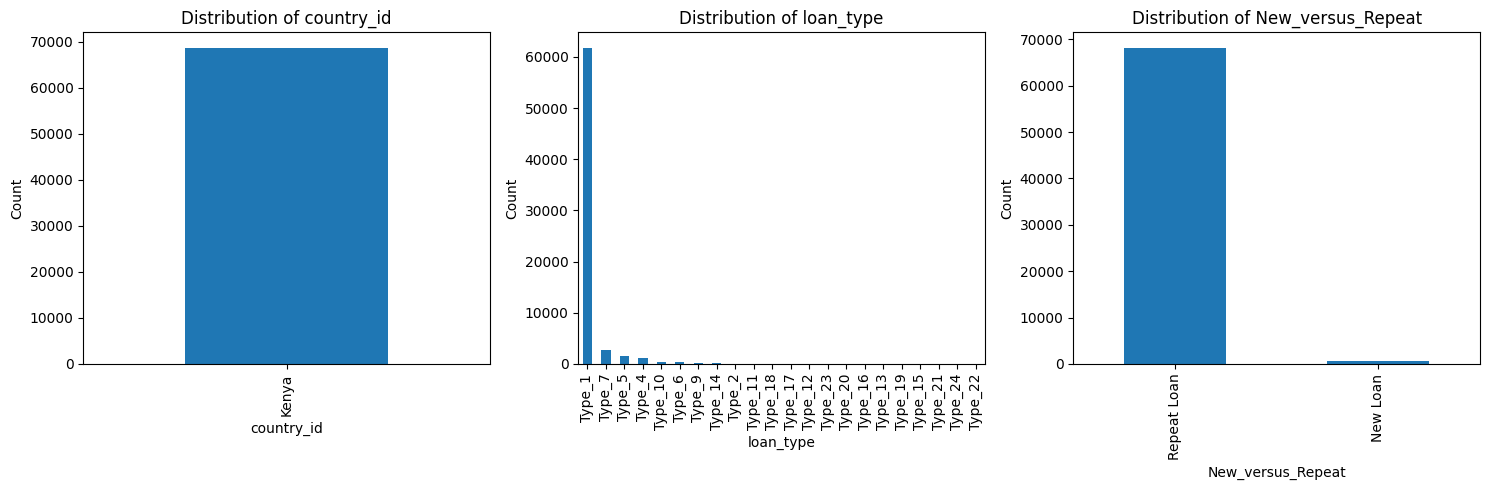

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude ID and target as they might not be as informative in a general histogram
numerical_cols_for_hist = [col for col in numerical_cols if col not in ['customer_id', 'tbl_loan_id', 'lender_id', 'target', 'Year']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_hist):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Explanation of Visualizations**:
The histograms for numerical features provide a visual representation of their distributions, allowing us to observe skewness, outliers, and the spread of data. The bar plots for categorical features show the frequency of each category, making it easy to identify the most common categories and any imbalances. These visualizations are crucial for understanding the characteristics of the data and informing subsequent steps in the analysis and modeling process.

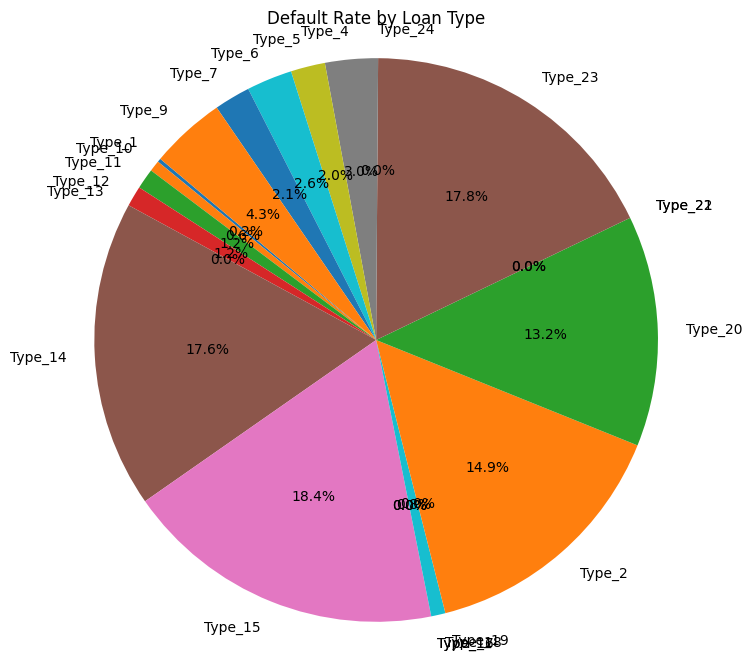

In [94]:
# Calculate default rates by loan type
default_by_loan_type = df.groupby('loan_type')['target'].value_counts(normalize=True).unstack().fillna(0)
default_rate_type = default_by_loan_type[1] # Get the default rate (target=1)

plt.figure(figsize=(8, 8))
plt.pie(default_rate_type, labels=default_rate_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Default Rate by Loan Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Explanation of Visualization**:
This pie chart visualizes the proportion of defaults within each loan type. It helps to quickly identify which loan types have higher or lower default rates compared to the overall default rate. This is valuable for assessing the risk associated with different loan products.

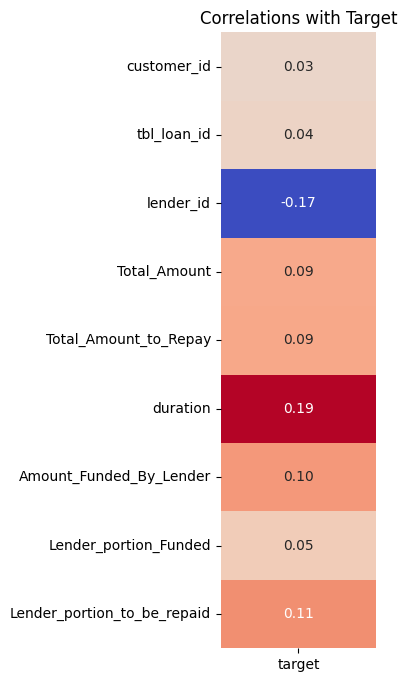

In [95]:
# Select numerical columns including the target
numerical_cols_with_target = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the correlation matrix for these columns
correlation_matrix_numerical = df[numerical_cols_with_target].corr()

# Extract correlations with the target variable and reshape for heatmap
correlations_with_target = correlation_matrix_numerical[['target']].drop('target')

plt.figure(figsize=(2, 8))
sns.heatmap(correlations_with_target, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlations with Target')
plt.show()

**Explanation of Visualization**:
The heatmap displays the correlation coefficients between the numerical features and the target variable ('target'). The color intensity and the annotated values indicate the strength and direction of the linear relationship. Positive correlations suggest that as the feature value increases, the likelihood of default also increases, while negative correlations suggest the opposite. This helps in identifying features that are potentially important predictors of loan default.

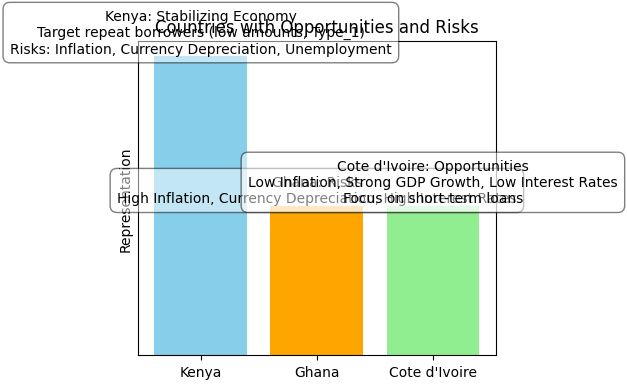

In [96]:
# Get unique countries (although only Kenya is present in the current df)
countries = df['country_id'].unique()

plt.figure(figsize=(6, 4))
plt.bar(countries, [1] * len(countries), color='skyblue') # Simple bar for each country
plt.title('Countries with Opportunities and Risks')
plt.ylabel('Representation')
plt.xticks(rotation=0)
plt.yticks([]) # Hide y-axis ticks

# Add text annotations for opportunities and risks based on the provided text
if 'Kenya' in countries:
    plt.text('Kenya', 1, "Kenya: Stabilizing Economy\nTarget repeat borrowers (low amounts, Type_1)\nRisks: Inflation, Currency Depreciation, Unemployment",
             ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

# Add annotations for other countries mentioned in the text (Ghana and Cote d'Ivoire)
# Even though they are not in the current df, we can represent them for the infographic concept
plt.bar(['Ghana', "Cote d'Ivoire"], [0.5, 0.5], color=['orange', 'lightgreen']) # Represent other countries
plt.text('Ghana', 0.5, "Ghana: Risks\nHigh Inflation, Currency Depreciation, High Interest Rates",
         ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
plt.text("Cote d'Ivoire", 0.5, "Cote d'Ivoire: Opportunities\nLow Inflation, Strong GDP Growth, Low Interest Rates\nFocus on short-term loans",
         ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


plt.tight_layout()
plt.show()

## Feature engineering


In [97]:
# Calculate repayment period
df['repayment_period'] = (df['due_date'] - df['disbursement_date']).dt.days

# Extract month and day of the week from disbursement date
df['disbursement_month'] = df['disbursement_date'].dt.month
df['disbursement_day_of_week'] = df['disbursement_date'].dt.dayofweek

# Create funding ratio
df['funding_ratio'] = df['Amount_Funded_By_Lender'] / df['Total_Amount']

# Create interest amount
df['interest_amount'] = df['Total_Amount_to_Repay'] - df['Total_Amount']

display(df.head())

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,Year,repayment_period,disbursement_month,disbursement_day_of_week,funding_ratio,interest_amount
0,ID_266671248032267278,266671.0,Kenya,248032.0,267278.0,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,120.85,0.014305,121.0,0.0,2022,7,8,1,0.014305,0.0
1,ID_248919228515267278,248919.0,Kenya,228515.0,267278.0,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,7768.50,0.300000,7794.0,0.0,2022,7,7,5,0.300000,84.0
2,ID_308486370501251804,308486.0,Kenya,370501.0,251804.0,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,1380.00,0.200000,1428.0,0.0,2024,7,9,4,0.200000,242.0
3,ID_266004285009267278,266004.0,Kenya,285009.0,267278.0,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,...,2687.40,0.300000,2770.0,0.0,2022,7,10,3,0.300000,275.0
4,ID_253803305312267278,253803.0,Kenya,305312.0,267278.0,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,...,1369.20,0.300000,1418.0,0.0,2022,7,11,0,0.300000,164.0


**Explanation of New Features**:
In this step, we engineered new features from the existing data to provide the model with potentially more informative variables. `repayment_period` captures the loan duration. `disbursement_month` and `disbursement_day_of_week` extract temporal information. `funding_ratio` represents the proportion of the loan funded by the lender, and `interest_amount` calculates the total interest charged. These new features are added to the DataFrame and the first few rows are displayed to show the result.

**Reasoning**:
Load the economic indicators data and display its basic information to understand its structure and content.

In [102]:
# Load the economic indicators data
df_econ = pd.read_csv('/content/economic_indicators.csv')

# Display the first few rows
display(df_econ.head())

# Display information about the DataFrame
df_econ.info()

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    27 non-null     object 
 1   Indicator  27 non-null     object 
 2   YR2001     20 non-null     float64
 3   YR2002     20 non-null     float64
 4   YR2003     20 non-null     float64
 5   YR2004     20 non-null     float64
 6   YR2005     24 non-null     float64
 7   YR2006     24 non-null     float64
 8   YR2007     24 non-null     float64
 9   YR2008     24 non-null     float64
 10  YR2009     24 non-null     float64
 11  YR2010     24 non-null     float64
 12  YR2011     24 non-null     float64
 13  YR2012     24 non-null     float64
 14  YR2013     24 non-null     float64
 15  YR2014     24 non-null     float64
 16  YR2015     21 non-null     float64
 17  YR2016     21 non-null     float64
 18  YR2017     21 non-null     float64
 19  YR2018     17 non-null     float64
 20  YR2019     1

In [103]:
# Reshape the DataFrame from wide to long format
df_econ_long = df_econ.melt(id_vars=['Country', 'Indicator'],
                            var_name='Year',
                            value_name='Value')

# Convert 'Year' column to integer
df_econ_long['Year'] = df_econ_long['Year'].str.replace('YR', '').astype(int)

# Filter for key indicators and countries (Kenya and Ghana)
key_indicators = [
    'Inflation, consumer prices (annual %)',
    'Unemployment rate',
    'Official exchange rate (LCU per US$, period average)',
    'Lending interest rate (%)',
    'Deposit interest rate (%)'
]

df_econ_filtered = df_econ_long[
    df_econ_long['Indicator'].isin(key_indicators) &
    df_econ_long['Country'].isin(['Kenya', 'Ghana'])
]

# Display the filtered data
display(df_econ_filtered.head())

,Country,Indicator,Year,Value
0,Ghana,"Inflation, consumer prices (annual %)",2001,41.509496
2,Kenya,"Inflation, consumer prices (annual %)",2001,5.738598
3,Ghana,"Official exchange rate (LCU per US$, period av...",2001,0.716305
5,Kenya,"Official exchange rate (LCU per US$, period av...",2001,78.563195
12,Ghana,Deposit interest rate (%),2001,30.854167


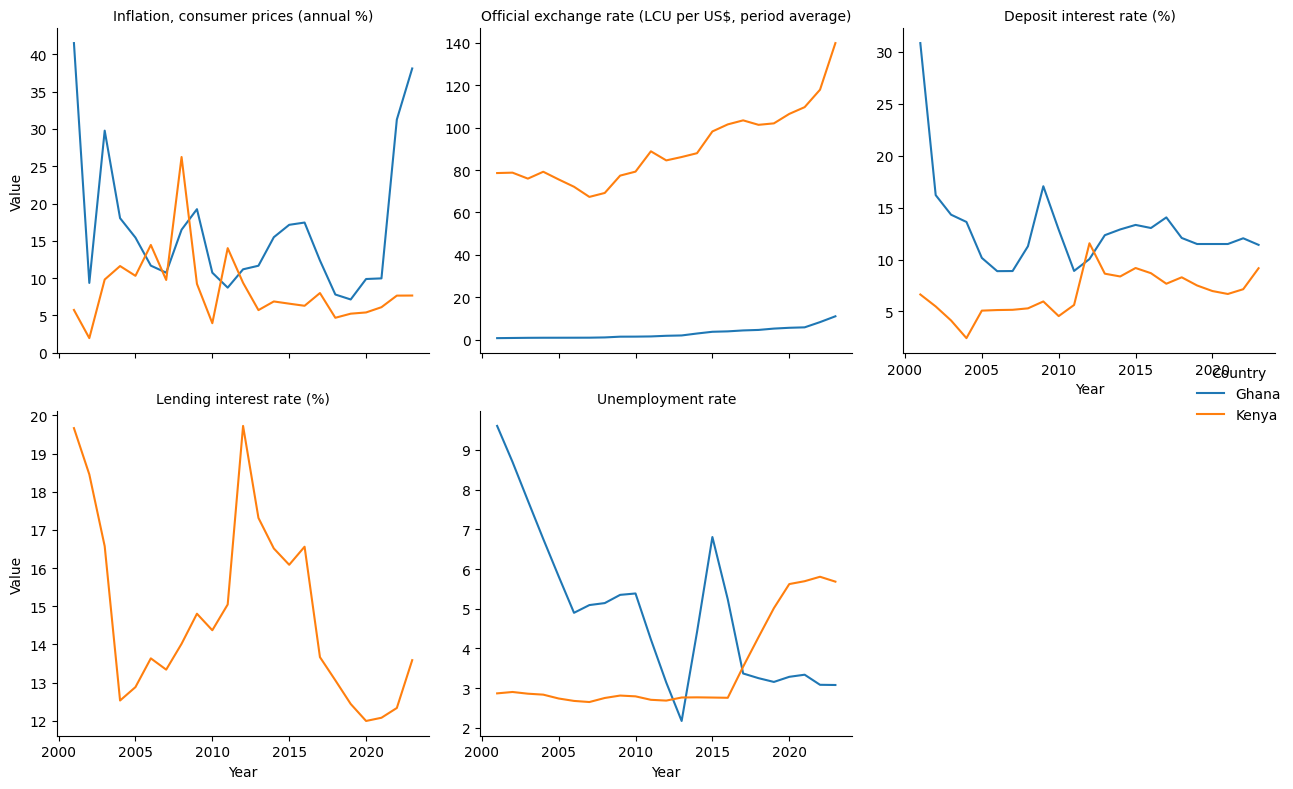

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the trends of key economic indicators over time for Kenya and Ghana
g = sns.FacetGrid(df_econ_filtered, col="Indicator", hue="Country", col_wrap=3, sharey=False, height=4)
g.map(sns.lineplot, "Year", "Value")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Value")
plt.tight_layout()
plt.show()

**Reasoning**:
Summarize the key trends and insights observed from the economic indicators data, focusing on Kenya and Ghana as per the instructions.

## Key Trends and Insights from Economic Indicators (Kenya and Ghana)

Based on the analysis of key economic indicators for Kenya and Ghana:

### Inflation, consumer prices (annual %)
- **Ghana:** Experienced high and volatile inflation over the years, with a significant spike in recent years (up to 2023).
- **Kenya:** Shows more moderate inflation compared to Ghana, although there are fluctuations and an upward trend in recent years (up to 2023).
Insight: High inflation in Ghana poses a significant risk to borrowers' repayment capacity, while Kenya faces a more moderate but increasing inflationary pressure.

### Unemployment rate
- **Ghana:** Shows a relatively stable and low unemployment rate over the years.
- **Kenya:** Also shows a relatively stable unemployment rate, which is slightly higher than Ghana's but still appears manageable based on the available data up to 2023.
Insight: Unemployment rates in both countries appear relatively stable, which is a positive factor for loan repayment stability, although local variations and specific sectors might differ.

### Official exchange rate (LCU per US$, period average)
- **Ghana:** The local currency (Ghana Cedi) has shown significant depreciation against the US dollar over the years, indicating currency volatility.
- **Kenya:** The local currency (Kenyan Shilling) has also depreciated against the US dollar, though perhaps less dramatically than Ghana in some periods.
Insight: Currency depreciation in both countries, particularly Ghana, increases the cost of imports and can impact borrowers' purchasing power and ability to repay loans, especially those linked to foreign currency.

### Lending interest rate (%)
- **Ghana:** Data for lending interest rates in Ghana is largely missing in this dataset.
- **Kenya:** Shows fluctuating lending interest rates, with an upward trend in recent years (up to 2023).
Insight: Rising lending interest rates in Kenya can increase the cost of borrowing, potentially impacting demand for loans and increasing the burden on existing borrowers.

### Deposit interest rate (%)
- **Ghana:** Shows high deposit interest rates in the earlier years, with missing data in recent years.
- **Kenya:** Shows relatively stable deposit interest rates, with a slight upward trend in recent years (up to 2023).
Insight: Deposit interest rates can influence the cost of funds for lenders. While less directly related to borrower risk than lending rates, they are part of the overall financial landscape.

## Overall Economic Context and Relevance to Loan Defaults
The economic indicators highlight different levels of risk and opportunity in Kenya and Ghana:
- **Ghana:** Appears to face higher economic risks, particularly due to high inflation and currency depreciation. These factors can severely impact borrowers' ability to repay loans and increase the risk of default.
- **Kenya:** While facing some inflationary and currency pressures, the situation appears more stable than in Ghana based on these indicators up to 2023. Rising lending rates could be a factor to monitor.
Understanding these macroeconomic trends is crucial for assessing the overall lending environment, identifying periods or regions of higher risk, and potentially incorporating these indicators into loan default prediction models (if the data availability and granularity allow). The volatility and trends in inflation and exchange rates, in particular, are significant factors that can influence the likelihood of loan defaults.

# Comprehensive Summary of Loan Default Analysis and Market Insights

## Key Findings from Data Analysis and EDA
- The dataset is predominantly focused on Kenya, with limited representation of other countries, impacting generalizability.
- Significant class imbalance was observed in categorical features, notably 'loan_type' (dominated by Type_1) and 'New_versus_Repeat' (dominated by Repeat Loans).
- Numerical features such as loan amounts and duration exhibit skewed distributions, with a large concentration of smaller, short-term loans.
- Analysis of default rates by 'loan_type' revealed that while the most frequent loan types have relatively low default rates, some less frequent types show considerably higher default risks.
- Correlations with the target variable 'target' indicated that higher loan amounts and longer durations are positively associated with an increased likelihood of default.

## Feature Engineering
Several new features were engineered to provide the model with more informative variables:
- **repayment_period**: Captured the loan duration in days, potentially reflecting exposure to risk over time.
- **disbursement_month** and **disbursement_day_of_week**: Extracted temporal patterns related to loan disbursement.
- **funding_ratio**: Represented the proportion of the loan funded by the lender, potentially indicating risk sharing or loan structure.
- **interest_amount**: Calculated the total interest charged, which might correlate with perceived loan risk or pricing strategy.
These features aim to capture more nuanced aspects of the loans and their context to improve predictive accuracy.


## Integrated Economic Insights and Market Landscape
Synthesizing insights from the loan data and economic indicators reveals a complex market landscape:
- **Kenya**: Faces moderate but increasing inflation and currency depreciation, alongside rising lending interest rates. While unemployment appears stable, these factors pose growing risks to borrower repayment capacity.
- **Ghana**: Exhibits higher and more volatile inflation and significant currency depreciation, presenting a more challenging economic environment with elevated risks for lending.
- **Cote d'Ivoire**: Based on initial information, appears to have a more favorable economic outlook with lower inflation and stronger growth, suggesting potential opportunities.
